In [1]:
require 'torch'
require 'nn'
require 'optim'
mnist = require 'mnist'
require 'image'

In [2]:
fullset = mnist.traindataset()
-- testset = mnist.testdataset()

In [6]:
print(fullset)

{
  data : ByteTensor - size: 60000x28x28
  size : 60000
  label : ByteTensor - size: 60000
}


In [7]:
itorch.image(fullset.data[1])

In [9]:
fullset.label[1]

5	


In [3]:
trainset = {
    size = 50000,
    data = fullset.data[{{1,50000}}]:double(),
    label = fullset.label[{{50001,60000}}]
}
validationset = {
    size = 10000,
    data = fullset.data[{{50001,60000}}]:double(),
    label = fullset.label[{{50001,60000}}]
}

In [14]:
sgd_params = {
   learningRate = 1e-2,
   learningRateDecay = 1e-4,
   weightDecay = 1e-3,
   momentum = 1e-4
}

In [35]:
-- targets = torch.rand(5)
-- targets:add(0.5)
-- print(targets)

trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [4]:

-- fullset.data[1]


In [39]:

itorch.image(image.scale(fullset.data[1], 14, 14))


In [107]:
data = fullset.data[{{1,2}}]
data = data:reshape(2,1,28,28):type('torch.DoubleTensor')



  2
  1
 56
 56
[torch.LongStorage of size 4]



In [109]:
itorch.image(image.scale(fullset.data[{{1,2}}], 14, 14))

In [5]:
scaled_data = image.scale(fullset.data[{{1,300}}], 14, 14)
scaled_data = scaled_data:reshape(300,1,14,14):type('torch.DoubleTensor')

-- m = nn.SpatialFullConvolution(1, 1, 2, 2, 2, 2, 0, 0, 0, 0)
-- o = m:forward(scaled_data)
-- print(o:size())

-- itorch.image(scaled_data)

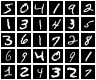

32.515306122449	
32.390306122449	
5810.7704081633	


In [197]:
itorch.image(scaled_data)

index1 = 4
index2 = 7

c1 = nn.AbsCriterion()
loss1 = c1:forward(scaled_data[index1], scaled_data[index2])
print(loss1)

c2 = nn.SmoothL1Criterion()
loss2 = c2:forward(scaled_data[index1], scaled_data[index2])
print(loss2)

c3 = nn.MSECriterion()
loss3 = c3:forward(scaled_data[index1], scaled_data[index2])
print(loss3)


In [198]:
itorch.image(fullset.data[1])
itorch.image(scaled_data[1])
itorch.image(image.scale(scaled_data[1],28,28))

In [204]:
a = torch.Tensor(28,28):copy(image.scale(image.scale(fullset.data[1], 14, 14), 28, 28))
print(a:size())
b = torch.Tensor(28,28):copy(fullset.data[1])
print(b:size())
c1 = nn.AbsCriterion()
loss1 = c1:forward(a, b)
print(loss1)

 28
 28
[torch.LongStorage of size 2]

 28
 28
[torch.LongStorage of size 2]

17.961734693878	


In [12]:

fullset = mnist.traindataset()
label = fullset.data:type('torch.DoubleTensor')
mean = label:mean()
std = label:std()
label:add(-mean)
label:div(std)

label = label[{{1,300}}]

data = image.scale(label, 14, 14)
data = data:resize(300,1,14,14)
label = label:resize(300,1,28,28)

-- itorch.image(label[1])
-- label = torch.tanh(label)
-- itorch.image(label[1])


In [13]:



trainset = {}
trainset.data = data
trainset.label = label
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);

function trainset:size() 
    return self.data:size(1)
end

-- print(torch.type(data))
-- print(torch.type(label))
-- itorch.image(data[1])
-- itorch.image(label[1])




In [14]:


model = nn.Sequential()
model:add(nn.SpatialConvolution(1,8,3,3,1,1,1,1))
model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialConvolution(8,8,3,3,1,1,1,1))
-- model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialBatchNormalization(8))

model:add(nn.SpatialFullConvolution(8, 8, 2, 2, 2, 2, 0, 0, 0, 0))
model:add(nn.LeakyReLU(0.2))
-- model:add(nn.SpatialBatchNormalization(8))

model:add(nn.View(8*28*28))

-- model:add(nn.Linear(8*28*28, 2*28*28))
-- model:add(nn.Sigmoid())
model:add(nn.Linear(8*28*28, 8*28*28))
-- model:add(nn.LeakyReLU(0.2))
-- model:add(nn.Linear(1024, 1))
model:add(nn.Tanh())

model:add(nn.Linear(8*28*28, 28*28))

-- output = model:forward(data)
-- print(output:size())

criterion = nn.MSECriterion()

trainer = nn.StochasticGradient(model, criterion)
trainer.learningRate = 0.1
trainer.maxIteration = 10
trainer:train(trainset)

# StochasticGradient: training	

# current error = 0.60333550635698	


# current error = 0.30045516544519	


# current error = 0.2057210379593	


# current error = 0.16033254042503	


# current error = 0.13396477405866	


# current error = 0.11714951700847	


# current error = 0.1059465927397	


# current error = 0.097024239134995	


# current error = 0.091775996327066	


# current error = 0.085819429833502	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.085819429833502	


In [15]:
-- model:forward(trainset.data[1])
s = model:forward(trainset.data[1])
-- print(s:resize(28,28))
itorch.image(s:resize(28,28))

In [27]:
index = 108
itorch.image(data[index])
itorch.image(label[index])
s = model:forward(data[index])
itorch.image(image.scale(data[index],28,28))
itorch.image(s:resize(28,28))



In [85]:
-- print(s)